<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/8684925862_d736e153bf_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4944731313_023a0508fd_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14313509432_6f2343d6c8_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7164500544_332b75aa3b.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8905148527_ba9f55cd78.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4713533500_fcc295de70_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg')]

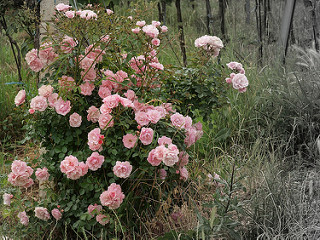

In [8]:
PIL.Image.open(str(roses[1]))

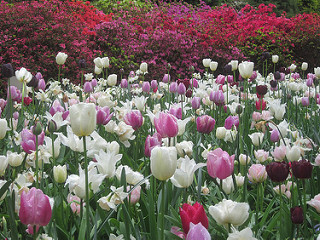

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4713533500_fcc295de70_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 180, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)              

Epoch 1/15
86/86 [==============================] - 11s 22ms/step - loss: 1.4513 - accuracy: 0.4044
Epoch 2/15
86/86 [==============================] - 2s 22ms/step - loss: 1.0167 - accuracy: 0.5992
Epoch 3/15
86/86 [==============================] - 2s 22ms/step - loss: 0.8452 - accuracy: 0.6799
Epoch 4/15
86/86 [==============================] - 2s 22ms/step - loss: 0.6819 - accuracy: 0.7453
Epoch 5/15
86/86 [==============================] - 2s 22ms/step - loss: 0.4598 - accuracy: 0.8448
Epoch 6/15
86/86 [==============================] - 2s 22ms/step - loss: 0.2716 - accuracy: 0.9135
Epoch 7/15
86/86 [==============================] - 2s 22ms/step - loss: 0.1730 - accuracy: 0.9469
Epoch 8/15
86/86 [==============================] - 2s 22ms/step - loss: 0.0980 - accuracy: 0.9677
Epoch 9/15
86/86 [==============================] - 2s 22ms/step - loss: 0.0933 - accuracy: 0.9749
Epoch 10/15
86/86 [==============================] - 2s 22ms/step - loss: 0.0601 - accuracy: 0.9836
Epoch 11

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 16ms/step - loss: 2.8678 - accuracy: 0.6242


[2.8678395748138428, 0.6241829991340637]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -4.16246  ,   3.179102 ,  17.803804 ,  -4.266359 ,  -4.04754  ],
       [  9.180146 ,  -9.206907 ,   6.4298954,   5.7958903,   4.0614038],
       [ -4.0706754,   3.4366224,   5.5937715,   6.609346 ,   2.1453352],
       ...,
       [  6.5568695, -10.596506 ,  -2.5139518,   8.19964  ,  11.292146 ],
       [  7.1138186,  -9.169052 , -12.205689 ,   1.6059817,  18.303894 ],
       [ -3.6672127, -10.688467 ,   4.7089915,  11.59981  ,   5.9867105]],
      dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

2

In [26]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [28]:
img_height=img_width=180

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

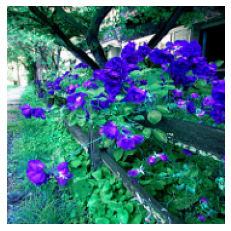

In [30]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

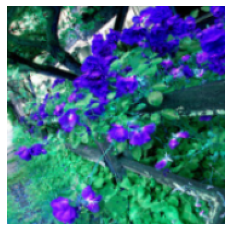

In [31]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [32]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)    

Epoch 1/15
86/86 [==============================] - 3s 25ms/step - loss: 1.3801 - accuracy: 0.4095
Epoch 2/15
86/86 [==============================] - 2s 24ms/step - loss: 1.1305 - accuracy: 0.5360
Epoch 3/15
86/86 [==============================] - 2s 24ms/step - loss: 1.0123 - accuracy: 0.6003
Epoch 4/15
86/86 [==============================] - 2s 24ms/step - loss: 0.9157 - accuracy: 0.6475
Epoch 5/15
86/86 [==============================] - 2s 24ms/step - loss: 0.8575 - accuracy: 0.6675
Epoch 6/15
86/86 [==============================] - 2s 24ms/step - loss: 0.8005 - accuracy: 0.6904
Epoch 7/15
86/86 [==============================] - 2s 24ms/step - loss: 0.7815 - accuracy: 0.7020
Epoch 8/15
86/86 [==============================] - 2s 25ms/step - loss: 0.7521 - accuracy: 0.7198
Epoch 9/15
86/86 [==============================] - 2s 25ms/step - loss: 0.7182 - accuracy: 0.7257
Epoch 10/15
86/86 [==============================] - 2s 24ms/step - loss: 0.6721 - accuracy: 0.7485
Epoch 11/

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 0.7480 - accuracy: 0.7211


[0.7480077147483826, 0.7211328744888306]

In [34]:
predictions= model.predict(X_test_scaled)


In [35]:
arr=[]
for i in predictions:
    for j in range(len(i)):
        a=max(i)
        if(a==i[j]):
            arr.append(j)
            break

In [36]:
from sklearn.metrics import classification_report, confusion_matrix


print(confusion_matrix(y_test,arr))

[[130  11  10   3  22]
 [  8 116  24   3   3]
 [ 15  22 175  11   3]
 [  4  11  11 121   3]
 [ 61   9  15   7 120]]


In [37]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,arr))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       176
           1       0.69      0.75      0.72       154
           2       0.74      0.77      0.76       226
           3       0.83      0.81      0.82       150
           4       0.79      0.57      0.66       212

    accuracy                           0.72       918
   macro avg       0.73      0.73      0.72       918
weighted avg       0.73      0.72      0.72       918



In [38]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [39]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [40]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [41]:
data_dir

'./datasets/flower_photos'

In [42]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [43]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/8684925862_d736e153bf_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4944731313_023a0508fd_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14313509432_6f2343d6c8_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7164500544_332b75aa3b.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8905148527_ba9f55cd78.jpg')]

In [44]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [45]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4713533500_fcc295de70_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg')]

In [46]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [47]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [48]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4713533500_fcc295de70_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8747396730_966149e6fe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg')]

In [49]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'

In [50]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [51]:
img.shape

(240, 180, 3)

In [52]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [53]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [54]:
X = np.array(X)
y = np.array(y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [56]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [57]:
X[0].shape

(224, 224, 3)

In [58]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

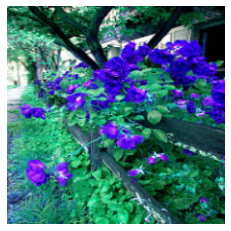

In [59]:
plt.axis('off')
plt.imshow(X[0])

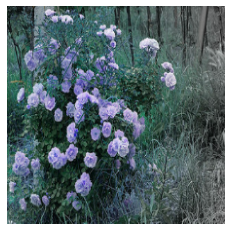

In [60]:
plt.axis('off')
plt.imshow(X[1])

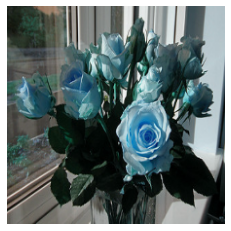

In [61]:
plt.axis('off')
plt.imshow(X[2])

In [62]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([550, 795, 795])

In [63]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [64]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [65]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


h=model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 7s 41ms/step - loss: 0.8199 - acc: 0.6835
Epoch 2/10
86/86 [==============================] - 3s 41ms/step - loss: 0.4202 - acc: 0.8579
Epoch 3/10
86/86 [==============================] - 3s 41ms/step - loss: 0.3245 - acc: 0.8877
Epoch 4/10
86/86 [==============================] - 3s 40ms/step - loss: 0.2746 - acc: 0.9153
Epoch 5/10
86/86 [==============================] - 3s 40ms/step - loss: 0.2406 - acc: 0.9270
Epoch 6/10
86/86 [==============================] - 3s 41ms/step - loss: 0.2109 - acc: 0.9411
Epoch 7/10
86/86 [==============================] - 3s 40ms/step - loss: 0.1858 - acc: 0.9524
Epoch 8/10
86/86 [==============================] - 3s 40ms/step - loss: 0.1679 - acc: 0.9564
Epoch 9/10
86/86 [==============================] - 3s 41ms/step - loss: 0.1530 - acc: 0.9622
Epoch 10/10
86/86 [==============================] - 3s 40ms/step - loss: 0.1371 - acc: 0.9695


In [66]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 52ms/step - loss: 0.3171 - acc: 0.8922


[0.3170935809612274, 0.8921568393707275]

In [67]:
from sklearn.metrics import classification_report
  

In [68]:
predictions= model.predict(X_test_scaled)

In [69]:
arr=[]
for i in predictions:
    for j in range(len(i)):
        a=max(i)
        if(a==i[j]):
            arr.append(j)
            break

In [70]:
from sklearn.metrics import classification_report, confusion_matrix


print(confusion_matrix(y_test,arr))


[[150   4   2   1  19]
 [  6 135  11   1   1]
 [  0  14 204   6   2]
 [  0   4   5 137   4]
 [ 11   2   1   5 193]]


In [71]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,arr))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       176
           1       0.85      0.88      0.86       154
           2       0.91      0.90      0.91       226
           3       0.91      0.91      0.91       150
           4       0.88      0.91      0.90       212

    accuracy                           0.89       918
   macro avg       0.89      0.89      0.89       918
weighted avg       0.89      0.89      0.89       918

